# Building Neural Networks with TensorFlow [Car Price Prediction]

In [53]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import  Normalization, Dense, Input
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

**Data Prepration**

In [54]:
dataset = pd.read_csv('car_price.csv')

In [55]:
dataset.head(3)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0


In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [57]:
dataset.isnull().sum()

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

In [58]:
dataset.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [59]:
dataset.shape

(1000, 12)

<Figure size 3000x3000 with 0 Axes>

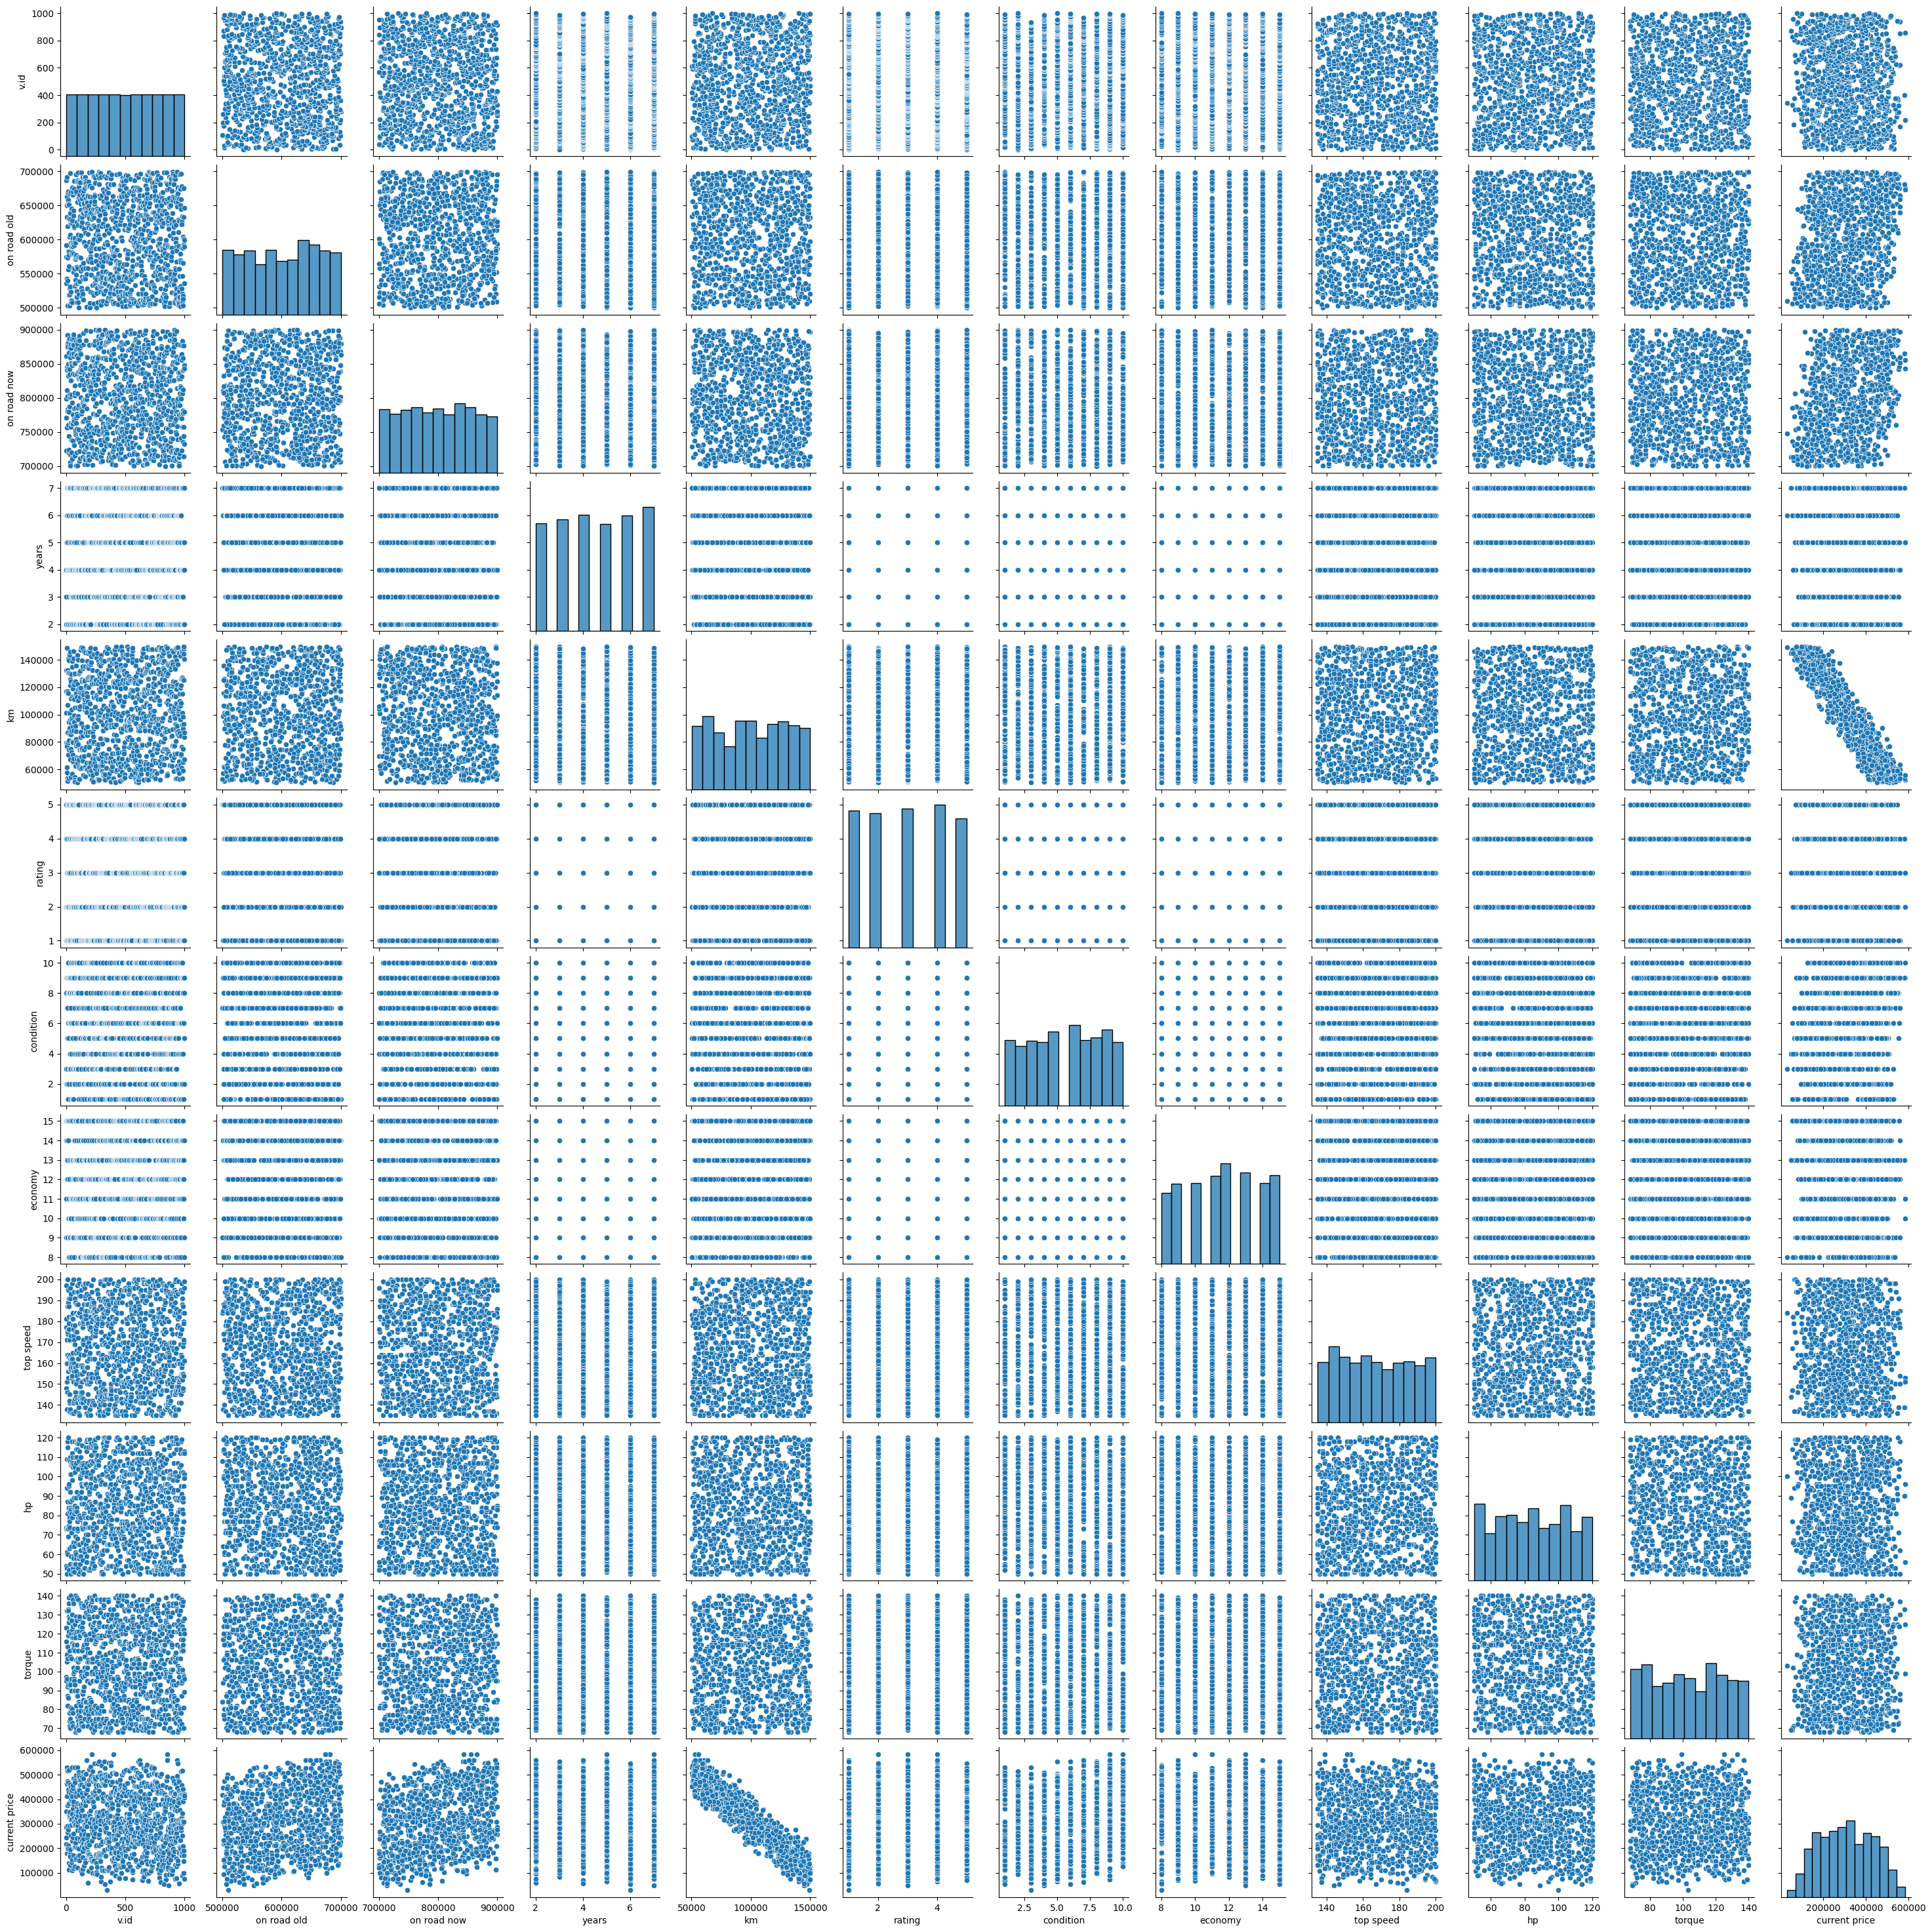

In [8]:
plt.figure(figsize=(30,30))
sns.pairplot(dataset)
plt.savefig('car_price_pairplot.png')

In [9]:
tensor_data = tf.constant(dataset)
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [10]:
print(tensor_data[:5])

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 3.000000e+00 7.894500e+04
  1.000000e+00 2.000000e+00 1.400000e+01 1.770000e+02 7.300000e+01
  1.230000e+02 3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 6.000000e+00 1.172200e+05
  5.000000e+00 9.000000e+00 9.000000e+00 1.480000e+02 7.400000e+01
  9.500000e+01 2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 2.000000e+00 1.325380e+05
  2.000000e+00 8.000000e+00 1.500000e+01 1.810000e+02 5.300000e+01
  9.700000e+01 2.153860e+05]
 [4.000000e+00 5.739990e+05 7.223810e+05 4.000000e+00 1.010650e+05
  4.000000e+00 3.000000e+00 1.100000e+01 1.970000e+02 5.400000e+01
  1.160000e+02 2.442955e+05]
 [5.000000e+00 6.913880e+05 8.113350e+05 6.000000e+00 6.155900e+04
  3.000000e+00 9.000000e+00 1.200000e+01 1.600000e+02 5.300000e+01
  1.050000e+02 5.311145e+05]], shape=(5, 12), dtype=float32)


In [11]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[5.720000e+02 5.915300e+05 7.206090e+05 3.000000e+00 1.243280e+05
  4.000000e+00 8.000000e+00 1.200000e+01 1.860000e+02 1.010000e+02
  1.250000e+02 1.758100e+05]
 [7.440000e+02 6.401870e+05 8.597540e+05 2.000000e+00 1.108280e+05
  1.000000e+00 3.000000e+00 9.000000e+00 1.790000e+02 5.600000e+01
  1.200000e+02 3.069825e+05]
 [1.020000e+02 6.987480e+05 8.378280e+05 3.000000e+00 1.105490e+05
  5.000000e+00 9.000000e+00 1.000000e+01 1.830000e+02 7.900000e+01
  1.110000e+02 3.572940e+05]
 [1.320000e+02 5.167470e+05 7.804130e+05 2.000000e+00 7.439600e+04
  1.000000e+00 6.000000e+00 1.500000e+01 1.590000e+02 9.500000e+01
  1.340000e+02 3.551750e+05]
 [1.400000e+02 6.389460e+05 7.932150e+05 7.000000e+00 1.486420e+05
  5.000000e+00 1.000000e+00 8.000000e+00 1.580000e+02 6.600000e+01
  8.800000e+01 1.148600e+05]], shape=(5, 12), dtype=float32)


In [12]:
x  = tensor_data[:, 3:-1]
print(x[:5])
print(x.shape)

tf.Tensor(
[[3.00000e+00 1.24328e+05 4.00000e+00 8.00000e+00 1.20000e+01 1.86000e+02
  1.01000e+02 1.25000e+02]
 [2.00000e+00 1.10828e+05 1.00000e+00 3.00000e+00 9.00000e+00 1.79000e+02
  5.60000e+01 1.20000e+02]
 [3.00000e+00 1.10549e+05 5.00000e+00 9.00000e+00 1.00000e+01 1.83000e+02
  7.90000e+01 1.11000e+02]
 [2.00000e+00 7.43960e+04 1.00000e+00 6.00000e+00 1.50000e+01 1.59000e+02
  9.50000e+01 1.34000e+02]
 [7.00000e+00 1.48642e+05 5.00000e+00 1.00000e+00 8.00000e+00 1.58000e+02
  6.60000e+01 8.80000e+01]], shape=(5, 8), dtype=float32)
(1000, 8)


In [13]:
y = tensor_data[:, -1]
print(y[:5].shape)
y = tf.expand_dims(y , axis = -1)
print(y[:5])

(5,)
tf.Tensor(
[[175810. ]
 [306982.5]
 [357294. ]
 [355175. ]
 [114860. ]], shape=(5, 1), dtype=float32)


In [14]:
normalizer = Normalization(axis = -1 , mean = 5 , variance = 4)
x_normalized = tf.constant([[3,4,5,6,7] , 
                            [2,3,4,5,6] , 
                            ])
normalizer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-1.5, -1. , -0.5,  0. ,  0.5]], dtype=float32)>

In [15]:
#x - mean / std
#std^2 = sqrt(variance)

In [16]:
normalizer = Normalization()
x_normalized = tf.constant([[3,4,5,6,7],
                            [2,3,4,5,6],
                            ])
normalizer.adapt(x_normalized)
normalizer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[ 1.,  1.,  1.,  1.,  1.],
       [-1., -1., -1., -1., -1.]], dtype=float32)>

In [17]:
print(x.shape)

(1000, 8)


In [18]:
normalizer = Normalization()
normalizer.adapt(x)
normalizer(x)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.9084975 ,  0.8255654 ,  0.7217801 ,  0.8529822 ,  0.16820414,
         0.99109256,  0.802372  ,  1.0251229 ],
       [-1.4904952 ,  0.36221924, -1.417883  , -0.9181599 , -1.177429  ,
         0.6279982 , -1.3920348 ,  0.7875727 ],
       [-0.9084975 ,  0.35264343,  1.4350011 ,  1.2072107 , -0.72888464,
         0.8354807 , -0.27044907,  0.3599823 ],
       [-1.4904952 , -0.88819754, -1.417883  ,  0.14452536,  1.5138373 ,
        -0.40941432,  0.50978446,  1.4527133 ],
       [ 1.4194933 ,  1.660069  ,  1.4350011 , -1.6266167 , -1.6259733 ,
        -0.46128497, -0.9043888 , -0.7327487 ]], dtype=float32)>

In [19]:
print(x[:5])

tf.Tensor(
[[3.00000e+00 1.24328e+05 4.00000e+00 8.00000e+00 1.20000e+01 1.86000e+02
  1.01000e+02 1.25000e+02]
 [2.00000e+00 1.10828e+05 1.00000e+00 3.00000e+00 9.00000e+00 1.79000e+02
  5.60000e+01 1.20000e+02]
 [3.00000e+00 1.10549e+05 5.00000e+00 9.00000e+00 1.00000e+01 1.83000e+02
  7.90000e+01 1.11000e+02]
 [2.00000e+00 7.43960e+04 1.00000e+00 6.00000e+00 1.50000e+01 1.59000e+02
  9.50000e+01 1.34000e+02]
 [7.00000e+00 1.48642e+05 5.00000e+00 1.00000e+00 8.00000e+00 1.58000e+02
  6.60000e+01 8.80000e+01]], shape=(5, 8), dtype=float32)


**Model Building and training**

In [20]:
num_features = x.shape[1]
model = tf.keras.Sequential([normalizer ,  
                             #InputLayer(input_shape = (8,)),
                             #tf.keras.layers.Dense(64 , activation = "relu" , name = "hidden_1"),
                             #tf.keras.layers.Dense(32 , activation = "relu" , name = "hidden_2"),
                             tf.keras.layers.Dense(1 , name = "output")
                             ])

model.build(input_shape = (None , num_features))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


In [21]:
tf.keras.utils.plot_model(model , to_file = "car_model.png" , show_shapes = True , show_layer_names = True , rankdir = "TB" , dpi = 96)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Model Visualization Process

1. **Install Required Packages**:
   - `pydot`: Python interface to Graphviz's Dot language
   - `graphviz`: Graph visualization software

2. **Model Building Steps**:
   - Determine input shape from features (x.shape[1])
   - Create Sequential model with layers
   - Explicitly build model with input shape
   - Plot model architecture

3. **Visualization Parameters**:
   - `show_shapes=True`: Display input/output shapes
   - `show_layer_names=True`: Show names of layers
   - `rankdir="TB"`: Top to Bottom layout (can use "LR" for Left to Right)

The generated `car_model.png` will show:
- Layer structure
- Input/output shapes
- Layer names
- Connections between layers

### Model Visualization Parameters Explained

- `show_shapes=True`: Shows the input/output shape of each layer
- `show_layer_names=True`: Displays the name of each layer
- `rankdir="TB"`: Sets the direction of the graph (Top to Bottom)
  - Can also use "LR" for Left to Right visualization
- `dpi=96`: Sets the resolution of the output image
- `show_dtype=True`: Shows the data type of each layer

The visualization will help you understand:
1. The flow of data through the network
2. The shape transformations at each layer
3. The structure of your model architecture
4. The connections between layers

**Error Sanctioning**

In [22]:
from tensorflow.keras.losses import Huber
model.compile(loss = Huber() , optimizer = Adam(learning_rate=1.0), metrics = [RootMeanSquaredError()] ,  run_eagerly = True )
        

### Model Compilation Parameters Explained

1. **Loss Function** (`MeanSquaredError`):
   - Measures the average squared difference between predictions and actual values
   - Good choice for regression problems
   - Penalizes larger errors more heavily

2. **Optimizer** (`Adam`):
   - Adaptive learning rate optimization algorithm
   - Combines benefits of:
     - RMSprop: Adapts learning rates based on moving average of squared gradients
     - Momentum: Accelerates gradient descent in relevant directions
   - Good default choice for many problems

3. **Metrics**:
   - `mae` (Mean Absolute Error):
     - Average absolute difference between predictions and actual values
     - More interpretable than MSE
   - `mse` (Mean Squared Error):
     - Same as loss function
     - Useful for monitoring training

4. **run_eagerly**:
   - When `True`: Enables eager execution (immediate evaluation)
   - Helpful for debugging
   - May slow down training
   - Set to `False` for production/final training

Note: The experimental parameters from the original code are no longer needed in current TensorFlow versions as these features are either:
- Integrated into the main functionality
- Deprecated
- Replaced with better alternatives

**Training and Optimization**

In [23]:
history = model.fit(x , y , epochs = 50 , verbose = 1)

Epoch 1/50
32/32 [==============================] - 0s 13ms/step - loss: 308505.3125 - root_mean_squared_error: 333247.0625
Epoch 2/50
32/32 [==============================] - 0s 13ms/step - loss: 308473.0938 - root_mean_squared_error: 333216.9688
Epoch 3/50
32/32 [==============================] - 0s 13ms/step - loss: 308440.9062 - root_mean_squared_error: 333187.4375
Epoch 4/50
32/32 [==============================] - 0s 12ms/step - loss: 308409.0000 - root_mean_squared_error: 333158.5000
Epoch 5/50
32/32 [==============================] - 0s 12ms/step - loss: 308377.0000 - root_mean_squared_error: 333129.4688
Epoch 6/50
32/32 [==============================] - 0s 13ms/step - loss: 308345.2500 - root_mean_squared_error: 333100.3438
Epoch 7/50
32/32 [==============================] - 0s 13ms/step - loss: 308312.9375 - root_mean_squared_error: 333070.2500
Epoch 8/50
32/32 [==============================] - 0s 12ms/step - loss: 308281.1250 - root_mean_squared_error: 333041.0312
Epoch 9/

In [24]:
history.history

{'loss': [308505.3125,
  308473.09375,
  308440.90625,
  308409.0,
  308377.0,
  308345.25,
  308312.9375,
  308281.125,
  308249.0,
  308217.28125,
  308185.03125,
  308152.96875,
  308121.0625,
  308089.03125,
  308057.0,
  308025.03125,
  307992.90625,
  307960.90625,
  307928.90625,
  307897.15625,
  307864.9375,
  307833.1875,
  307801.09375,
  307769.03125,
  307737.3125,
  307705.21875,
  307672.9375,
  307641.0,
  307608.9375,
  307576.96875,
  307544.9375,
  307512.90625,
  307481.03125,
  307448.90625,
  307417.1875,
  307385.1875,
  307352.875,
  307321.125,
  307288.90625,
  307256.90625,
  307225.0625,
  307193.09375,
  307160.90625,
  307128.875,
  307097.125,
  307065.03125,
  307033.03125,
  307001.0,
  306969.125,
  306936.875],
 'root_mean_squared_error': [333247.0625,
  333216.96875,
  333187.4375,
  333158.5,
  333129.46875,
  333100.34375,
  333070.25,
  333041.03125,
  333011.125,
  332981.25,
  332951.90625,
  332921.125,
  332890.65625,
  332861.09375,
  332831.

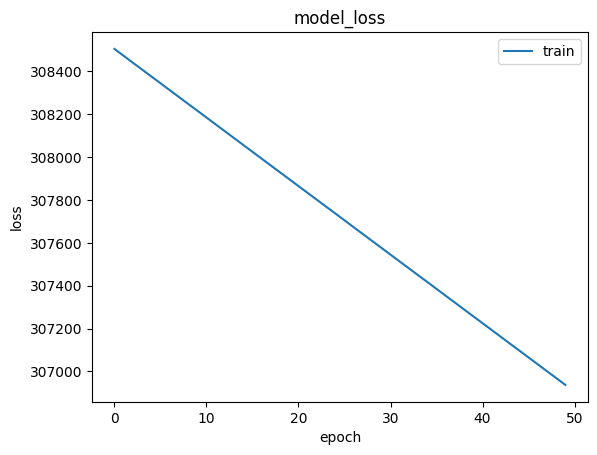

In [25]:
plt.plot(history.history["loss"])
plt.title("model_loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"])
plt.show()


**Performance Measurement**

In [26]:
history.history

{'loss': [308505.3125,
  308473.09375,
  308440.90625,
  308409.0,
  308377.0,
  308345.25,
  308312.9375,
  308281.125,
  308249.0,
  308217.28125,
  308185.03125,
  308152.96875,
  308121.0625,
  308089.03125,
  308057.0,
  308025.03125,
  307992.90625,
  307960.90625,
  307928.90625,
  307897.15625,
  307864.9375,
  307833.1875,
  307801.09375,
  307769.03125,
  307737.3125,
  307705.21875,
  307672.9375,
  307641.0,
  307608.9375,
  307576.96875,
  307544.9375,
  307512.90625,
  307481.03125,
  307448.90625,
  307417.1875,
  307385.1875,
  307352.875,
  307321.125,
  307288.90625,
  307256.90625,
  307225.0625,
  307193.09375,
  307160.90625,
  307128.875,
  307097.125,
  307065.03125,
  307033.03125,
  307001.0,
  306969.125,
  306936.875],
 'root_mean_squared_error': [333247.0625,
  333216.96875,
  333187.4375,
  333158.5,
  333129.46875,
  333100.34375,
  333070.25,
  333041.03125,
  333011.125,
  332981.25,
  332951.90625,
  332921.125,
  332890.65625,
  332861.09375,
  332831.

In [27]:
model.evaluate(x, y, verbose=2)

32/32 - 0s - loss: 306919.7188 - root_mean_squared_error: 331778.8438 - 172ms/epoch - 5ms/step


[306919.71875, 331778.84375]

### Understanding `model.evaluate()`

`model.evaluate(x, y, verbose=0)` evaluates the model on test data and returns:
1. The loss value (Huber loss in our case)
2. All metric values defined in `model.compile()` (RMSE and MAE)

The returned values correspond to:
- First value: Loss function (Huber loss)
- Second value: Root Mean Squared Error (RMSE)
- Third value: Mean Absolute Error (MAE)

`verbose=0` means no progress bar is shown during evaluation.

**VALIDATION AND TESTING**

In [28]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(x)

In [29]:
x_train = x[:int(TRAIN_RATIO * DATASET_SIZE)]
y_train = y[:int(TRAIN_RATIO * DATASET_SIZE)]
print(x_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [30]:
x_val = x[int(DATASET_SIZE * TRAIN_RATIO ): int((TRAIN_RATIO + VAL_RATIO) * DATASET_SIZE)]
y_val = y[int(DATASET_SIZE * TRAIN_RATIO ): int((TRAIN_RATIO + VAL_RATIO) * DATASET_SIZE)]
print(x_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [31]:
x_test = x[int((TRAIN_RATIO + VAL_RATIO) * DATASET_SIZE) : ]
y_test = y[int((TRAIN_RATIO + VAL_RATIO) * DATASET_SIZE) : ]
print(x_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [32]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [33]:
test_dataset = test_dataset.shuffle(buffer_size = 8 , reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [34]:
# First, verify test data exists and its shape
print("Test data shapes:")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Create test dataset with explicit type casting and verification
test_dataset = tf.data.Dataset.from_tensor_slices((
    tf.cast(x_test, tf.float32),
    tf.cast(y_test, tf.float32)
))

# Set a fixed batch size and count batches
BATCH_SIZE = 32
test_dataset = test_dataset.batch(BATCH_SIZE)

# Count the number of batches
n_batches = sum(1 for _ in test_dataset)
print(f"\nNumber of batches in test dataset: {n_batches}")

if n_batches > 0:
    # Evaluate only if we have data
    test_results = model.evaluate(test_dataset, verbose=2)
    
    # Print results with proper labels
    metric_names = ['loss'] + [metric.name for metric in model.metrics]
    print("\nTest Results:")
    print("-" * 30)
    for name, value in zip(metric_names, test_results):
        print(f"{name}: {value:.4f}")
else:
    print("Error: Test dataset is empty!")

Test data shapes:
x_test shape: (100, 8)
y_test shape: (100, 1)

Number of batches in test dataset: 4
4/4 - 0s - loss: 296016.5938 - root_mean_squared_error: 319574.1562 - 26ms/epoch - 6ms/step

Test Results:
------------------------------
loss: 296016.5938
loss: 319574.1562


In [35]:
# First, create training and validation splits
#from sklearn.model_selection import train_test_split

# Split training data into train and validation sets
#x_train, x_val, y_train, y_val = train_test_split(
#    x_train, y_train, 
#    test_size=0.2,            # 20% for validation
#    random_state=42           # For reproducibility
#)

# Create TensorFlow datasets
BATCH_SIZE = 32

# Training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=len(x_train))
train_dataset = train_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

# Validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)


# test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

'''print("Dataset shapes:")
print(f"Training data   : {x_train.shape}")
print(f"Validation data : {x_val.shape}")

# Now train the model
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=val_dataset,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
    ]
)'''

'print("Dataset shapes:")\nprint(f"Training data   : {x_train.shape}")\nprint(f"Validation data : {x_val.shape}")\n\n# Now train the model\nhistory = model.fit(\n    train_dataset,\n    epochs=100,\n    validation_data=val_dataset,\n    verbose=1,\n    callbacks=[\n        tf.keras.callbacks.EarlyStopping(\n            monitor=\'val_loss\',\n            patience=10,\n            restore_best_weights=True\n        )\n    ]\n)'

In [36]:
# Create test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(32)

# Evaluate the model
test_results = model.evaluate(test_dataset, verbose=1)

# Print results with proper labels
metric_names = ['loss'] + [metric.name for metric in model.metrics]
for name, value in zip(metric_names, test_results):
    print(f"{name}: {value:.4f}")

4/4 [==============================] - 0s 7ms/step - loss: 296016.5938 - root_mean_squared_error: 319574.1562
loss: 296016.5938
loss: 319574.1562


In [37]:
for x,y in val_dataset:
    print(x ,y)
    break

tf.Tensor(
[[5.00000e+00 1.49234e+05 5.00000e+00 5.00000e+00 1.20000e+01 1.99000e+02
  1.00000e+02 1.23000e+02]
 [5.00000e+00 9.14490e+04 5.00000e+00 1.00000e+01 1.10000e+01 1.49000e+02
  7.00000e+01 1.20000e+02]
 [7.00000e+00 6.19100e+04 5.00000e+00 4.00000e+00 1.00000e+01 1.62000e+02
  1.13000e+02 1.06000e+02]
 [7.00000e+00 9.10950e+04 4.00000e+00 7.00000e+00 1.50000e+01 1.61000e+02
  1.19000e+02 1.05000e+02]
 [2.00000e+00 1.11290e+05 1.00000e+00 3.00000e+00 1.10000e+01 1.83000e+02
  8.00000e+01 8.20000e+01]
 [4.00000e+00 8.72630e+04 2.00000e+00 1.00000e+01 1.50000e+01 1.37000e+02
  7.60000e+01 1.20000e+02]
 [5.00000e+00 7.60960e+04 5.00000e+00 5.00000e+00 1.30000e+01 1.62000e+02
  9.10000e+01 8.30000e+01]
 [3.00000e+00 9.75380e+04 3.00000e+00 7.00000e+00 9.00000e+00 1.98000e+02
  1.02000e+02 1.11000e+02]
 [2.00000e+00 1.14405e+05 5.00000e+00 3.00000e+00 1.40000e+01 1.79000e+02
  6.30000e+01 7.10000e+01]
 [4.00000e+00 9.89800e+04 4.00000e+00 7.00000e+00 1.30000e+01 1.46000e+02
  1.06

In [38]:
x_test = x[int((TRAIN_RATIO + VAL_RATIO) * DATASET_SIZE) : ]
y_test = y[int((TRAIN_RATIO + VAL_RATIO) * DATASET_SIZE) : ]
print(x_test.shape)
print(y_test.shape)

(0, 8)
(0, 1)


In [39]:
normalizer = Normalization()
normalizer.adapt(x_train)
normalizer(x)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.24835175,  1.6838024 ,  1.4489828 , -0.18923578,  0.18178701,
         1.6687489 ,  0.7325437 ,  0.94748664],
       [ 0.24835175, -0.29249305,  1.4489828 ,  1.5960115 , -0.26706904,
        -0.95012754, -0.7117232 ,  0.80467635],
       [ 1.400124  , -1.3027515 ,  1.4489828 , -0.5462853 , -0.7159251 ,
        -0.26921967,  1.3583927 ,  0.13822834],
       [ 1.400124  , -0.30460012,  0.7329939 ,  0.5248631 ,  1.5283551 ,
        -0.3215972 ,  1.6472461 ,  0.09062491],
       [-1.4793066 ,  0.38608578, -1.4149729 , -0.90333474, -0.26706904,
         0.83070844, -0.23030087, -1.004254  ]], dtype=float32)>

In [40]:
#history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), verbose=1)
history = model.fit(train_dataset, epochs=100, validation_data= val_dataset, verbose=1)

Epoch 1/100


25/25 [==============================] - 0s 15ms/step - loss: 307745.1875 - root_mean_squared_error: 332705.0625 - val_loss: 311102.5625 - val_root_mean_squared_error: 336204.4688
Epoch 2/100
25/25 [==============================] - 0s 14ms/step - loss: 307719.9688 - root_mean_squared_error: 332682.0000 - val_loss: 311078.3125 - val_root_mean_squared_error: 336181.9062
Epoch 3/100
25/25 [==============================] - 0s 14ms/step - loss: 307694.7812 - root_mean_squared_error: 332657.8750 - val_loss: 311053.6875 - val_root_mean_squared_error: 336157.7500
Epoch 4/100
25/25 [==============================] - 0s 14ms/step - loss: 307669.5938 - root_mean_squared_error: 332634.1562 - val_loss: 311030.4688 - val_root_mean_squared_error: 336137.1562
Epoch 5/100
25/25 [==============================] - 0s 15ms/step - loss: 307644.3125 - root_mean_squared_error: 332611.0000 - val_loss: 311006.3438 - val_root_mean_squared_error: 336114.5938
Epoch 6/100
25/25 [==============================] -

In [41]:
history.history

{'loss': [307745.1875,
  307719.96875,
  307694.78125,
  307669.59375,
  307644.3125,
  307619.1875,
  307594.09375,
  307568.75,
  307543.625,
  307518.46875,
  307493.40625,
  307467.96875,
  307442.84375,
  307417.71875,
  307392.53125,
  307367.375,
  307342.375,
  307317.09375,
  307291.8125,
  307266.53125,
  307241.1875,
  307216.25,
  307190.96875,
  307165.6875,
  307140.6875,
  307115.4375,
  307090.1875,
  307064.90625,
  307039.71875,
  307014.75,
  306989.34375,
  306964.1875,
  306939.09375,
  306913.84375,
  306888.625,
  306863.40625,
  306838.3125,
  306812.90625,
  306788.03125,
  306762.5625,
  306737.40625,
  306712.25,
  306687.0625,
  306661.90625,
  306636.59375,
  306611.375,
  306586.15625,
  306561.0625,
  306535.96875,
  306510.875,
  306485.625,
  306460.21875,
  306435.125,
  306409.9375,
  306384.6875,
  306359.375,
  306334.28125,
  306309.09375,
  306283.875,
  306258.8125,
  306233.375,
  306208.1875,
  306183.09375,
  306157.90625,
  306132.6875,
  306

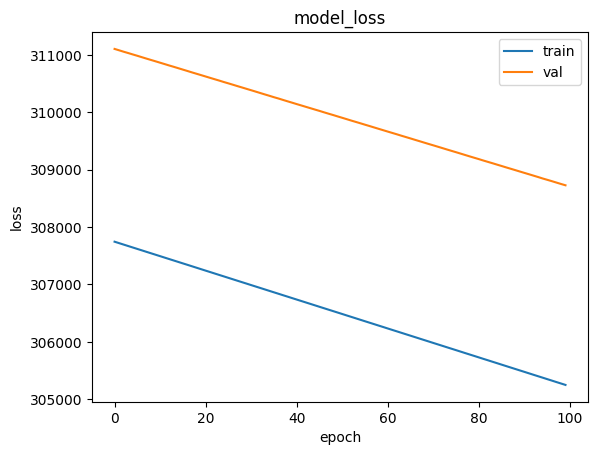

In [42]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model_loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "val"])
plt.show()

In [43]:
model.evaluate(x_train, y_train)

25/25 [==============================] - 0s 5ms/step - loss: 305237.3125 - root_mean_squared_error: 330349.4688


[305237.3125, 330349.46875]

In [44]:
model.evaluate(x_val , y_val, verbose=2)

4/4 - 0s - loss: 308727.7188 - root_mean_squared_error: 333994.4688 - 36ms/epoch - 9ms/step


[308727.71875, 333994.46875]

In [45]:
x_test.shape

TensorShape([0, 8])

In [46]:
model.predict(tf.expand_dims(x_val[0] , axis = 0))

1/1 [==============================] - 0s 22ms/step


array([[3965.2393]], dtype=float32)

In [47]:
x_test.shape

TensorShape([0, 8])

In [48]:
x_test.shape

TensorShape([0, 8])

In [49]:
y_test.shape

TensorShape([0, 1])

In [50]:
y_true = list(y_test[:0].numpy())

4/4 [==============================] - 0s 2ms/step
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


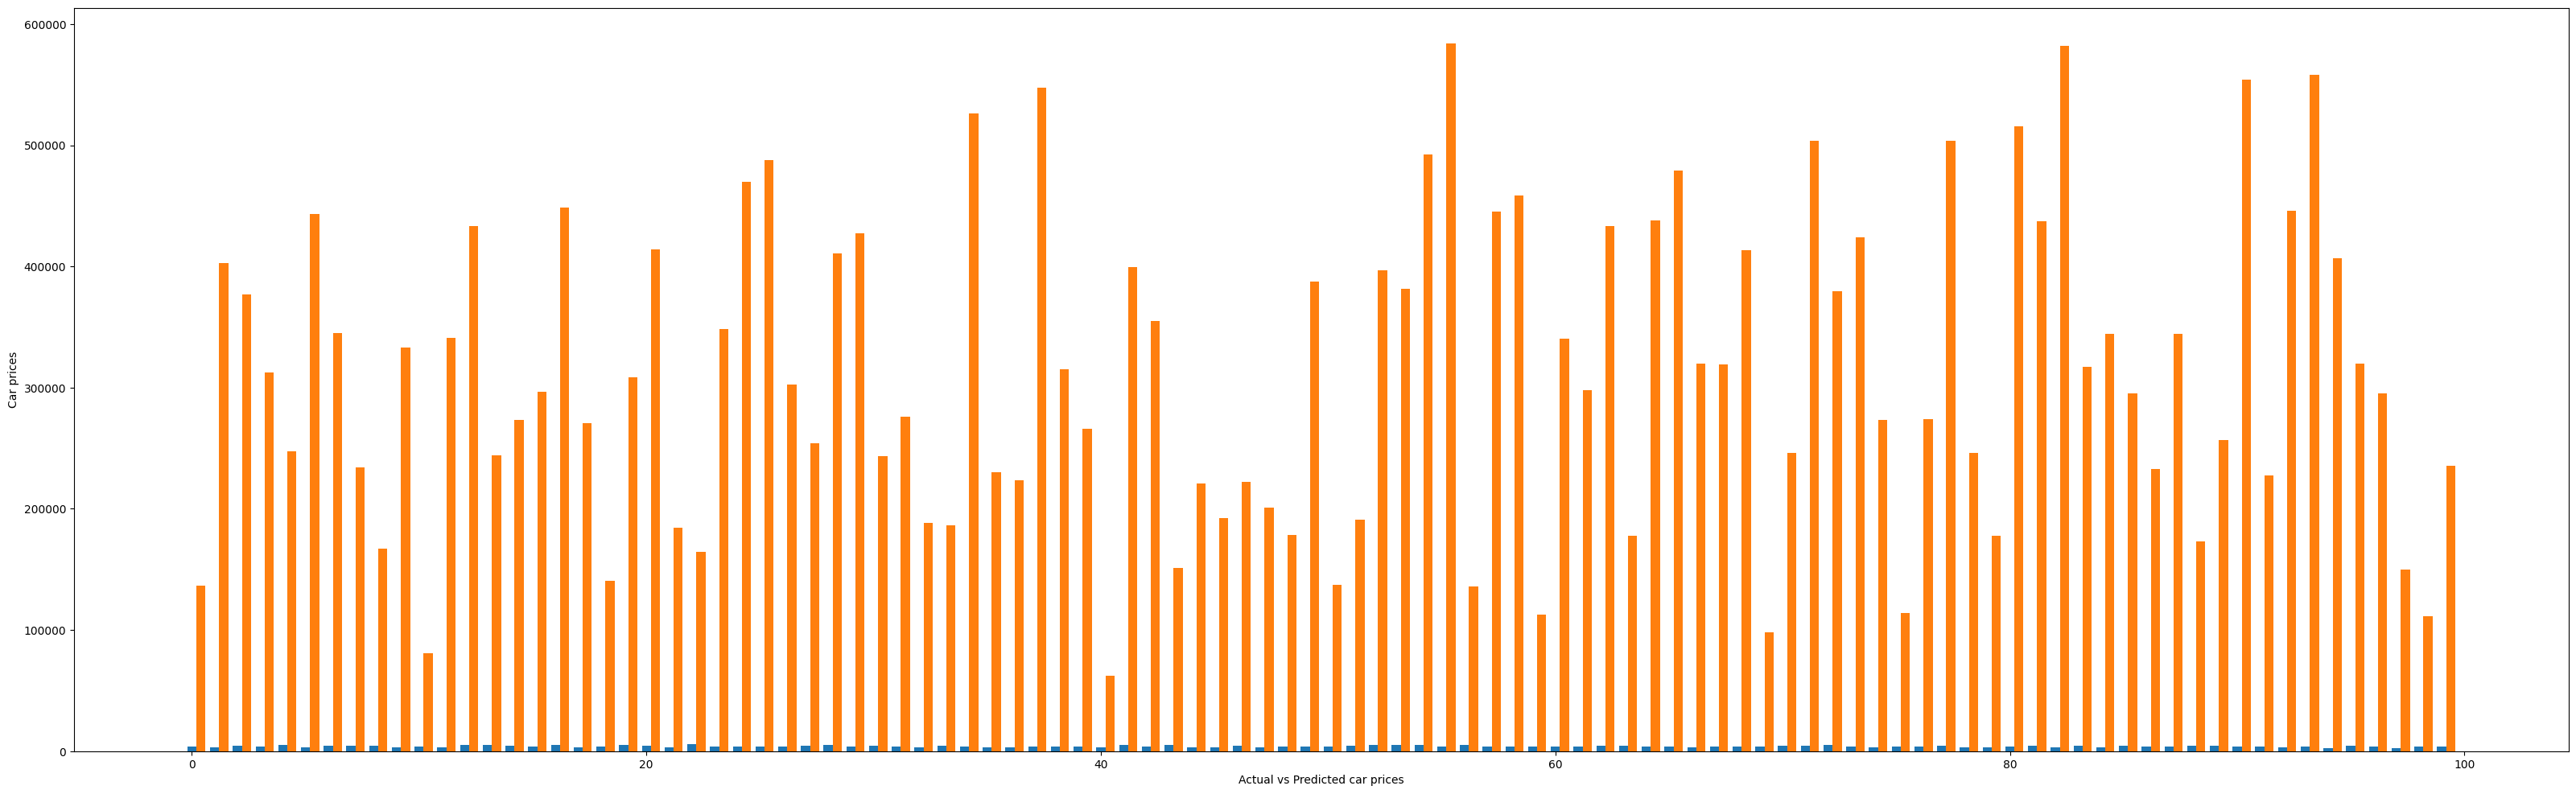

In [51]:
y_pred = model.predict(x_val).flatten()  # Flatten to 1D array
y_true = y_val.numpy().flatten()         # Convert to numpy and flatten


ind = np.arange(100)
print(ind)
plt.figure(figsize = (40,12))
width = 0.4

plt.bar(ind, y_pred, width, label='Predicted car prices')
plt.bar(ind +  width, y_true, width, label='Actual car prices')

plt.xlabel("Actual vs Predicted car prices")
plt.ylabel("Car prices")

plt.show()

**Corrective Measures**

In [52]:
# can increase no of dense layer

# Understanding Train Data Split

This code splits your data into training sets using a ratio:

```python
x_train = x[:int(TRAIN_RATIO * DATASET_SIZE)]
y_train = y[:int(TRAIN_RATIO * DATASET_SIZE)]
```

Let's break it down:
1. `TRAIN_RATIO`: Proportion of data used for training (e.g., 0.8 means 80%)
2. `DATASET_SIZE`: Total number of samples in your dataset
3. `int(TRAIN_RATIO * DATASET_SIZE)`: Calculates how many samples to use for training

The `.shape` output shows:
- First number: Number of samples in training set
- For x_train: Second number shows number of features
- For y_train: Shows it's a single column (target variable)

### Understanding the Output Shapes

```
(800, 8)  # x_train shape
(800, 1)  # y_train shape
```

1. **x_train shape (800, 8)**:
   - 800: Number of training samples/rows
   - 8: Number of features/columns for each sample
   - This means you have 800 cars with 8 different features each

2. **y_train shape (800, 1)**:
   - 800: Number of training samples/rows (matches x_train)
   - 1: One target variable (price) for each sample
   - The shape is (800, 1) instead of (800,) because it's formatted for deep learning

### Understanding Tensor Shapes in Deep Learning

1. **Input Shape (x_train)**:
   - Shape: `(800, 8)`
   - First dimension (800): Batch dimension (number of samples)
   - Second dimension (8): Feature dimension
   - Each row represents one car with its 8 features

2. **Output Shape (y_train)**:
   - Shape: `(800, 1)`
   - First dimension (800): Matches input batch size
   - Second dimension (1): Single target value (price)
   - Each row represents the price for corresponding car

3. **Why These Shapes Matter**:
   - Model expects input shape of `(None, 8)`
     - `None` means any batch size is acceptable
     - `8` is fixed number of features
   - Output shape will be `(None, 1)`
     - One predicted price per input sample
   - Shapes must be compatible for model training

### Understanding the Prediction Output

Let's break down the code and output:

1. `tf.expand_dims(x_test[0], axis=0)`:
   - `x_test[0]`: Takes the first sample from test data
   - `expand_dims`: Adds an extra dimension for batch size
   - `axis=0`: Adds dimension at the start
   - Changes shape from (8,) to (1, 8) as model expects batched input

2. The output `array([[4279.675]], dtype=float32)`:
   - Predicted price: $4,279.68
   - Double brackets `[[]]`: Indicates 2D array (batch size, predictions)
   - `dtype=float32`: 32-bit floating-point number

### Understanding TensorFlow Datasets and Training

1. **Data Splitting**:
   - Original training data split into:
     - Training set (80%)
     - Validation set (20%)
   - Using `sklearn.model_selection.train_test_split`
   - Random state set for reproducibility

2. **Dataset Creation**:
   ```python
   tf.data.Dataset.from_tensor_slices((x, y))
   ```
   - Creates a TensorFlow dataset from numpy arrays
   - Pairs features (x) with targets (y)

3. **Dataset Pipeline**:
   - `shuffle`: Randomizes data order
   - `batch`: Groups data into batches
   - `prefetch`: Optimizes data loading

4. **Training Configuration**:
   - Batch size: 32 samples per step
   - 100 epochs maximum
   - Early stopping monitors validation loss
   - Patience of 10 epochs
   - Best weights automatically restored

5. **Benefits of tf.data.Dataset**:
   - Efficient memory usage
   - Built-in data preprocessing
   - Optimized performance
   - Better GPU utilization